In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

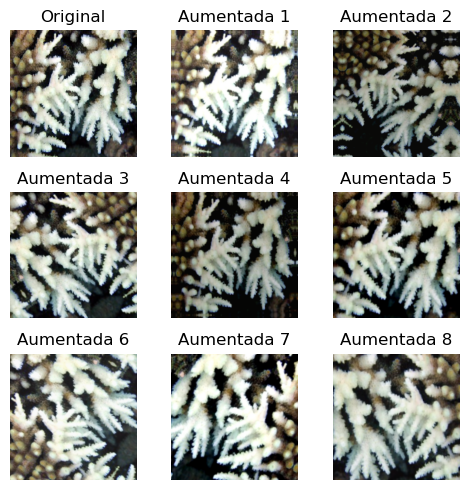

In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

image_path = 'dataset/bleached_corals/392871468_82f033b05d_o.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.utils.img_to_array(image)
image_batch = tf.expand_dims(image_array, 0)  # Adiciona batch dimension

plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    if i == 0:
        plt.imshow(tf.cast(image_array, tf.uint8))
        plt.title("Original")
    else:
        augmented_image = data_augmentation(image_batch)
        plt.imshow(tf.cast(augmented_image[0], tf.uint8))
        plt.title(f"Aumentada {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Ver imagens de batch inteiro

# for images, labels in X_train.take(1):
#     # Aplique o data augmentation
#     augmented_images = data_augmentation(images)

#     # Plote as imagens originais e aumentadas lado a lado
#     plt.figure(figsize=(12, 6))
#     for i in range(6):  # Mostra as 6 primeiras imagens do batch
#         # Original
#         plt.subplot(2, 6, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title("Original")
#         plt.axis("off")
        
#         # Augmentada
#         plt.subplot(2, 6, i + 7)
#         plt.imshow(augmented_images[i].numpy().astype("uint8"))
#         plt.title("Augmentada")
#         plt.axis("off")
#     plt.tight_layout()
#     plt.show()
#     break  # Mostra só o primeiro batch

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
seed = 1000
batch_size = 32
img_size=224

X_train, X_test = image_dataset_from_directory(
    directory="./dataset",
    labels="inferred",
    label_mode="binary",
    color_mode="rgb",
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="both",
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 923 files belonging to 2 classes.
Using 739 files for training.
Using 184 files for validation.


C:\Users\USER\AppData\Local\Temp\ipykernel_14044\1907842547.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(labels[i].numpy())


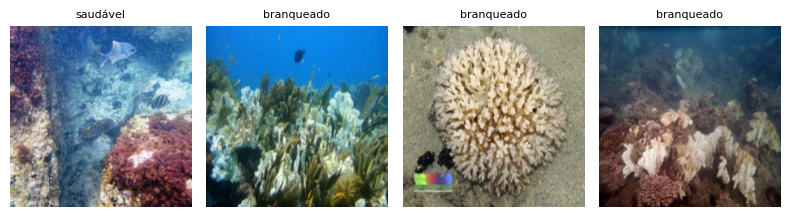

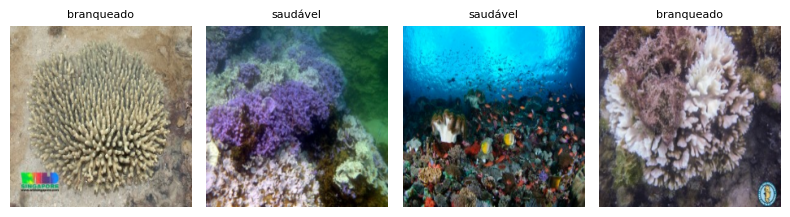

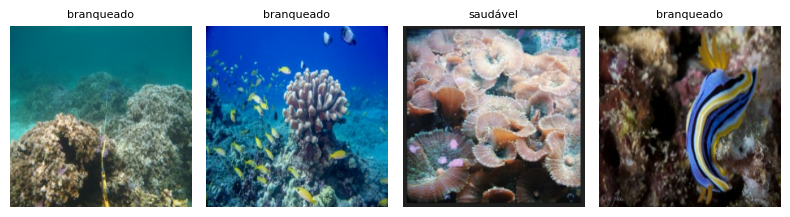

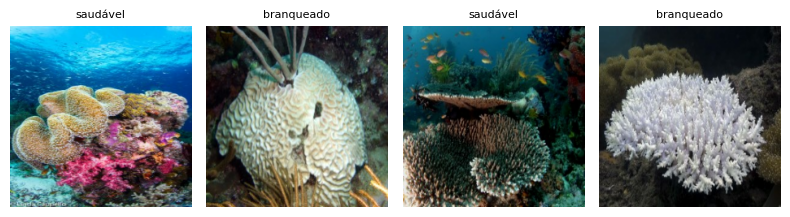

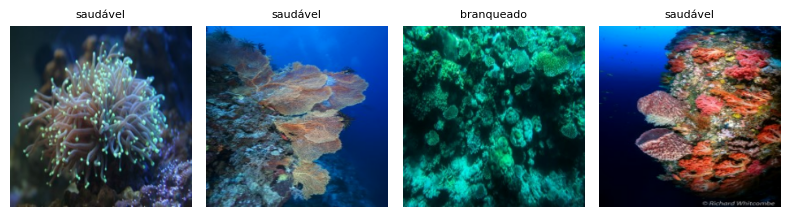

In [29]:
class_names = X_train.class_names

# Visualiza imagens com os nomes das classes
for images, labels in X_train.take(5):  # Pega 1 batch
    plt.figure(figsize=(8, 6))  # Tamanho total da figura (menor)
    for i in range(min(4, len(images))):  # Mostra até 12 imagens
        ax = plt.subplot(1, 4, i + 1)  # 3 linhas x 4 colunas
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = int(labels[i].numpy())
        name = class_names[label_index]
        title = ''
        if name == 'bleached_corals':
            title = 'branqueado'
        else:
            title = 'saudável'
        plt.title(title, fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()